In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Q1

cust = pd.read_csv(r'C:\Users\Sughu\Downloads\Python Foundation Case Study 1 - Retail Case Study\Customer.csv')

In [5]:
prod_cat = pd.read_csv(r'C:\Users\Sughu\Downloads\Python Foundation Case Study 1 - Retail Case Study\prod_cat_info.csv')

In [6]:
prod_cat['prod_subcat_code'] = prod_cat.prod_sub_cat_code

In [7]:
transaction = pd.read_csv(r'C:\Users\Sughu\Downloads\Python Foundation Case Study 1 - Retail Case Study\Transactions.csv')

In [8]:
product_transaction = pd.merge(left=transaction,right=prod_cat,on=['prod_cat_code','prod_subcat_code'],how='left')

In [9]:
Cust_Final = pd.merge(left=product_transaction,right=cust,left_on='cust_id',right_on='customer_Id',how='left')

In [10]:
#2 Summary Report
product_transaction.shape

(23053, 13)

In [11]:
Cust_Final.dtypes

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
dtype: object

In [20]:
Cust_Final['DOB'] = pd.to_datetime(Cust_Final.DOB,dayfirst=True)

In [21]:
Cust_Final['DOB']

0       1981-09-26
1       1973-05-11
2       1992-07-27
3       1981-06-08
4       1992-07-27
           ...    
23048   1972-02-21
23049   1984-04-27
23050   1976-06-20
23051   1970-05-22
23052   1982-01-15
Name: DOB, Length: 23053, dtype: datetime64[ns]

In [22]:
Cust_Final['tran_date'] = pd.to_datetime(Cust_Final.tran_date,dayfirst=True)

In [135]:
Cust_Final = Cust_Final.drop_duplicates()

In [136]:
Cust_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,270384,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,271509,1981-08-06,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,8,Personal Appliances,272357,1982-09-10,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,11,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,12,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,3,Kids,275108,1971-04-11,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,8,Personal Appliances,269014,1979-11-27,F,3.0


In [137]:
Cust_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,10,Non-Fiction,271982,1976-10-08,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,4,Mobiles,273982,1991-12-10,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,6,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,11,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,4,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,11,Children,271961,1982-01-15,M,1.0


In [138]:
Cust_Final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code,customer_Id,city_code
count,2.304000e+04,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23032.000000
mean,5.006955e+10,271021.880252,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,6.148785,271021.880252,5.483067
std,2.898062e+10,2431.573668,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,3.726197,2431.573668,2.863331
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000,266783.000000,1.000000
25%,2.493315e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000,268935.000000,3.000000
50%,5.009188e+10,270980.500000,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,5.000000,270980.500000,5.000000
75%,7.532632e+10,273114.250000,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,10.000000,273114.250000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,12.000000,275265.000000,10.000000


In [139]:
#method 1
Cust_Final.loc[:,Cust_Final.dtypes=='object'].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


In [140]:
#method 2 Findings frequencies individually
Cust_Final.Gender.value_counts()

M    11804
F    11227
Name: Gender, dtype: int64

In [141]:
Cust_Final.Store_type.value_counts()

e-Shop            9304
MBR               4660
Flagship store    4575
TeleShop          4501
Name: Store_type, dtype: int64

In [142]:
Cust_Final.prod_cat.value_counts()

Books               6066
Electronics         4895
Home and kitchen    4126
Footwear            2996
Clothing            2960
Bags                1997
Name: prod_cat, dtype: int64

In [143]:
Cust_Final.prod_subcat.value_counts()

Women                  3046
Mens                   2910
Kids                   1997
Tools                  1061
Fiction                1043
Kitchen                1036
Children               1035
Mobiles                1030
Comics                 1030
Bath                   1022
Furnishing             1007
Non-Fiction            1003
DIY                     989
Cameras                 985
Personal Appliances     970
Academic                966
Computers               958
Audio and video         952
Name: prod_subcat, dtype: int64

In [144]:
Cust_Final.dtypes

transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
dtype: object

In [145]:
Cust_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,270384,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,271509,1981-08-06,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,270911,1970-05-22,M,2.0


In [146]:
Cust_Final.dtypes

transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
dtype: object

In [147]:
#3  histograms for all continuous variables and frequency bars for categorical variables

Numeric_Cust = Cust_Final[['prod_subcat_code','prod_cat_code','Qty','Rate','Tax','total_amt']]

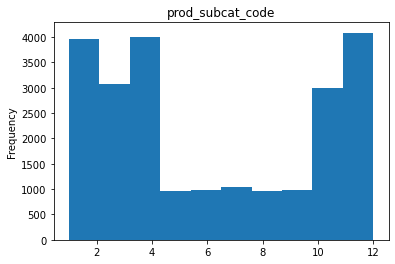

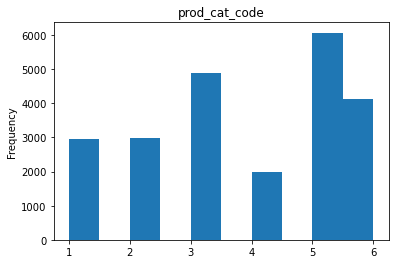

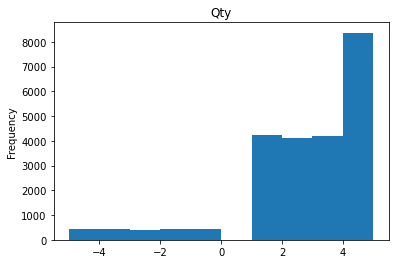

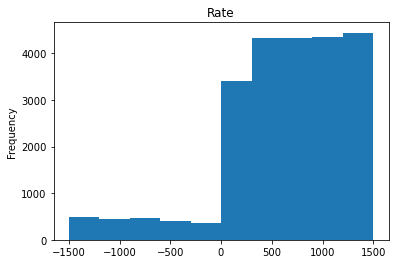

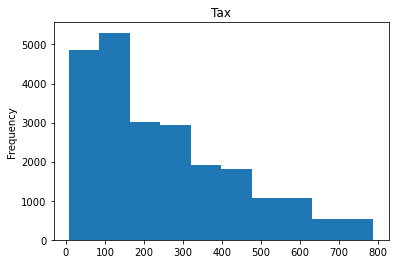

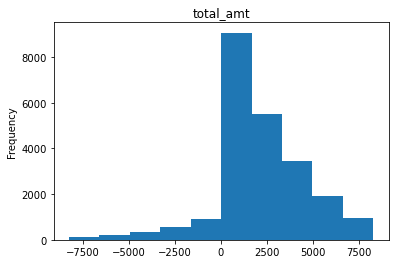

In [148]:
for var in Numeric_Cust:
        Numeric_Cust[var].plot(kind='hist')
        plt.title(var)
        plt.show()

       
    

In [149]:
Categ_Cust = Cust_Final[['Gender','Store_type','prod_cat','prod_subcat']]

C:\Users\Sughu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sughu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sughu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sughu\anaconda3\lib\si

<AxesSubplot:xlabel='prod_subcat', ylabel='count'>

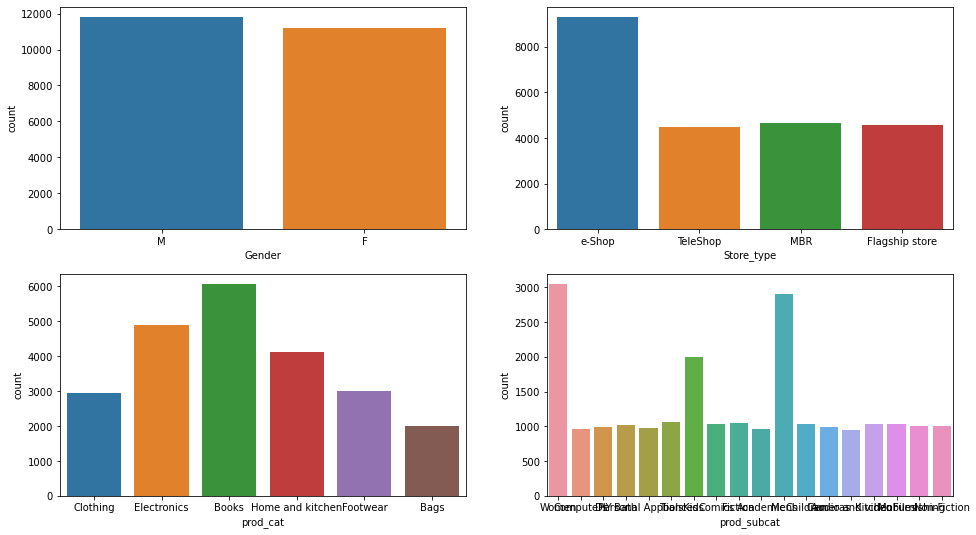

In [150]:
_,axes = plt.subplots(2,2,figsize=(16,9))
sns.countplot(Cust_Final.Gender,ax=axes[0,0])
sns.countplot(Cust_Final.Store_type,ax=axes[0,1])
sns.countplot(Cust_Final.prod_cat,ax=axes[1,0])
sns.countplot(Cust_Final.prod_subcat,ax=axes[1,1])

In [151]:
#4 Timeperiod of transaction data
Cust_Final.tran_date.max()

Timestamp('2014-12-02 00:00:00')

In [152]:
Cust_Final.tran_date.min()

Timestamp('2011-01-02 00:00:00')

In [153]:
print('TimePeriod of Traqnsaction data is from '+str(Cust_Final.tran_date.min())+' to '+str(Cust_Final.tran_date.max()))

TimePeriod of Traqnsaction data is from 2011-01-02 00:00:00 to 2014-12-02 00:00:00


In [154]:
# Count of transactions where the total amount of transaction was negative
Cust_Final.total_amt[Cust_Final['total_amt']<0].count()

2164

In [183]:
Cust_Final[['prod_cat','Gender','Qty']].groupby(['prod_cat','Gender']).sum().sort_values(by='Qty',ascending=False)

Qty
prod_cat         Gender      
Books            M       7587
                 F       7080
Electronics      M       6486
                 F       5832
Home and kitchen M       5051
                 F       4898
Clothing         M       3748
Footwear         F       3721
                 M       3561
Clothing         F       3425
Bags             F       2364
                 M       2346

In [ ]:
#Footwear and Bags are more popular among females compare to males

In [196]:
#  City code with maximum customers and their percentage
cust_each_city_code = Cust_Final[['city_code','customer_Id']].groupby('city_code').count().sort_values(by='customer_Id',ascending=False)

In [197]:
cust_each_city_code

,customer_Id
city_code,
4.0,2422
3.0,2410
5.0,2357
7.0,2356
10.0,2333
8.0,2328
2.0,2268
1.0,2255
9.0,2176


In [198]:
# City code 4.0 has more customers

In [157]:
Cust_Final.customer_Id.count()

23040

In [158]:
percentage = (cust_each_city_code.max()/ Cust_Final.customer_Id.count())*100

In [159]:
percentage
# City code 4.0 has more customers with 10.51%

customer_Id    10.512153
dtype: float64

In [160]:
#  stores which sells the maximum products by value and by quantity
Cust_Final[['Store_type','Rate','Qty']].groupby('Store_type').sum().sort_values(by='Rate',ascending=False)

,Rate,Qty
Store_type,,
e-Shop,5945770,22790
MBR,2953665,11195
Flagship store,2942874,11142
TeleShop,2836359,10993


In [ ]:
# e-Shop sells the maximum products by value and quantity

In [199]:
#Method 2
#Cust_Final.groupby('Store_type')['Rate','Qty'].sum().sort_values(by='Rate',ascending=False)

In [162]:
# Total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores

data1 = pd.pivot_table(data = Cust_Final,index='prod_cat',columns='Store_type',values='total_amt',aggfunc=sum)

In [163]:
data1.loc[['Electronics','Clothing'],['Flagship store']].sum()

Store_type
Flagship store    3409559.27
dtype: float64

In [164]:
# Total amount earned from "Male" customers under the "Electronics" category
Amount_by_male_cust = pd.pivot_table(data=Cust_Final,index='prod_cat',columns='Gender',values='total_amt',aggfunc=sum)

In [165]:
Amount_by_male_cust.loc[['Electronics'],['M']]

Gender,M
prod_cat,
Electronics,5711351.62


In [166]:
# customers with more than 10 unique transactions, after removing all transactions which have any negative amounts

positive_transactions = Cust_Final[Cust_Final['total_amt']>0]

In [167]:
positive_transactions.duplicated().sum()

0

In [168]:
positive_transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,5,Computers,270384,1973-11-05,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,12,Tools,267750,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,6,DIY,275023,1971-09-03,M,6.0
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,3,Comics,269345,1970-06-26,F,10.0
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,7,Fiction,268799,1979-06-27,M,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,270911,1970-05-22,M,2.0


In [169]:
transactions_count = positive_transactions.groupby(['cust_id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index().sort_values(by='transaction_id',ascending=False)

In [170]:
transactions_count

,cust_id,prod_cat,prod_subcat,transaction_id
6155,269503,Electronics,Audio and video,3
3398,268350,Footwear,Women,3
713,267126,Footwear,Mens,3
4909,268995,Electronics,Cameras,3
16004,273829,Electronics,Cameras,3
...,...,...,...,...
6700,269726,Home and kitchen,Tools,1
6699,269726,Home and kitchen,Bath,1
6697,269726,Clothing,Women,1
6696,269726,Clothing,Kids,1


In [171]:
unique_count = transactions_count.groupby('cust_id')['transaction_id'].count()

In [172]:
unique_count

cust_id
266783    3
266784    3
266785    5
266788    4
266794    8
         ..
275257    4
275261    3
275262    2
275264    2
275265    3
Name: transaction_id, Length: 5506, dtype: int64

In [173]:
transactions_count[transactions_count['transaction_id']>10]
# There are no customers with more than 10 unique transactions, after removing all transactions which have any negative amounts


,cust_id,prod_cat,prod_subcat,transaction_id


In [174]:
date = pd.to_datetime(dt.datetime.today())

In [175]:
Cust_Final['Age'] = date.year-Cust_Final['DOB'].dt.year

In [176]:
Cust_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code,Age
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,270351,1981-09-26,M,5.0,41
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,270384,1973-11-05,F,8.0,49
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0,30
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,271509,1981-08-06,M,3.0,41
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,274550,1972-02-21,M,7.0,50
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,270022,1984-04-27,M,9.0,38
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,271020,1976-06-20,M,8.0,46
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,270911,1970-05-22,M,2.0,52


In [177]:
# customers aged between 25 - 35,total amount spent for “Electronics” and “Books” product categories
New_Cust_data = Cust_Final[(Cust_Final['Age']>=25) & (Cust_Final['Age']<=35)]

In [178]:
New_Cust_data

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code,Age
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0,30
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0,30
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,1,Mens,268509,1989-08-17,M,10.0,33
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,4,Women,268444,1992-02-01,F,6.0,30
29,99581788104,267466,2014-02-20,3,2,1,96,10.080,106.080,Flagship store,Footwear,3,Women,267466,1987-06-08,F,7.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23033,32887353269,268885,2011-01-25,3,1,1,276,28.980,304.980,Flagship store,Clothing,3,Kids,268885,1989-04-14,F,6.0,33
23034,28972634039,275227,2011-01-25,9,3,1,334,35.070,369.070,MBR,Electronics,9,Cameras,275227,1989-09-23,M,4.0,33
23035,42161597232,267094,2011-01-25,3,1,3,147,46.305,487.305,MBR,Clothing,3,Kids,267094,1992-11-24,M,9.0,30
23038,61812307223,274306,2011-01-25,4,4,4,1447,607.740,6395.740,e-Shop,Bags,4,Women,274306,1989-12-01,M,2.0,33


In [179]:
New_Cust_data['total_amt'][(New_Cust_data['prod_cat']=='Electronics') | (New_Cust_data['prod_cat']=='Books')].sum()

6058458.64

In [200]:
#Method 2
#new_data = pd.pivot_table(data=New_Cust_data,index='prod_cat',values='total_amt',aggfunc=sum)

In [201]:
#new_data.loc[['Books','Electronics'],['total_amt']].sum()

total_amt    6058458.64
dtype: float64

In [202]:
#  the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014
Amount_spend = New_Cust_data[(New_Cust_data['tran_date']>='2014-01-01') & (New_Cust_data['tran_date']<='2014-03-01')]

In [203]:
Amount_spend['total_amt'].sum()

428230.595